In [2]:
import xarray as xr
%matplotlib inline

from os.path import dirname, join

import numpy as np
import pandas.io.sql as psql
#import sqlite3 as sql

from bokeh.plotting import figure
from bokeh.layouts import layout, widgetbox, row
from bokeh.models import ColumnDataSource, Div, PreText
from bokeh.models.widgets import Slider, Select, TextInput
from bokeh.io import curdoc

import bokeh as bokeh
import pandas as pd
import xarray as xr
import holoviews as hv
import numpy as np
import dask
import datashader as ds
from datashader.bokeh_ext import InteractiveImage
from holoviews.operation.datashader import datashade, shade, dynspread, rasterize
from holoviews.operation import decimate

import geoviews as gv
from cartopy import crs
import geoviews.feature as gf
import dask.array as da


/Users/jumue/anaconda3/envs/ncview2/lib/python3.7/site-packages/dask/dataframe/utils.py:13: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/Users/jumue/anaconda3/envs/ncview2/lib/python3.7/site-packages/datashader/transfer_functions.py:21: FutureWarning: xarray subclass Image should explicitly define __slots__
  class Image(xr.DataArray):


In [38]:
file = "2016032700-ART-chemtracer_grid_reg_DOM01_PL_0025.nc"
link = "http://eos.scc.kit.edu/thredds/dodsC/polstracc0new/2016032700/{}".format(file)

In [36]:
link = "../data/2016032700-ART-chemtracer_grid_reg_DOM01_PL_0025.nc"

In [39]:
first = xr.open_dataset(link)

OSError: [Errno -72] NetCDF: Malformed or inaccessible DAP DDS: b'http://eos.scc.kit.edu/thredds/dodsC/polstracc0new/2016032700/2016032700-ART-chemtracer_grid_reg_DOM01_PL_0025.nc'

In [22]:
first

<xarray.Dataset>
Dimensions:            (lat: 361, lev: 47, lon: 721, time: 1)
Coordinates:
  * lon                (lon) float64 -180.0 -179.5 -179.0 ... 179.0 179.5 180.0
  * lat                (lat) float64 -90.0 -89.5 -89.0 -88.5 ... 89.0 89.5 90.0
  * lev                (lev) float64 10.0 25.0 50.0 ... 9.5e+04 9.75e+04 1e+05
  * time               (time) float64 2.016e+07
Data variables:
    TRO3_chemtr        (time, lev, lat, lon) float32 ...
    qv                 (time, lev, lat, lon) float32 ...
    qc                 (time, lev, lat, lon) float32 ...
    qi                 (time, lev, lat, lon) float32 ...
    u                  (time, lev, lat, lon) float32 ...
    v                  (time, lev, lat, lon) float32 ...
    w                  (time, lev, lat, lon) float32 ...
    geopot             (time, lev, lat, lon) float32 ...
    omega              (time, lev, lat, lon) float32 ...
    pv                 (time, lev, lat, lon) float32 ...
    vor                (time, lev, lat, lon) float32 ...
    z_ifc              (lev, lat, lon) float32 ...
    temp               (time, lev, lat, lon) float32 ...
    TR_cold_chemtr     (time, lev, lat, lon) float32 ...
    TRN2O_chemtr       (time, lev, lat, lon) float32 ...
    TRNOy_chemtr       (time, lev, lat, lon) float32 ...
    TRO3_pas_chemtr    (time, lev, lat, lon) float32 ...
    TRN2O_pass_chemtr  (time, lev, lat, lon) float32 ...
    TRCly_pass_chemtr  (time, lev, lat, lon) float32 ...
    tempv              (time, lev, lat, lon) float32 ...
    TR_art_pv_chemtr   (time, lev, lat, lon) float32 ...
    TR_stn             (time, lev, lat, lon) float32 ...
    TR_stt             (time, lev, lat, lon) float32 ...
    TR_sts             (time, lev, lat, lon) float32 ...
    TR_trn             (time, lev, lat, lon) float32 ...
    TR_trt             (time, lev, lat, lon) float32 ...
    TRCH4_chemtr       (time, lev, lat, lon) float32 ...
    TRH2O_chemtr       (time, lev, lat, lon) float32 ...
    TRH2O_pass_chemtr  (time, lev, lat, lon) float32 ...
    TRC2H6_chemtr      (time, lev, lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.7.2 (http://mpimet.mpg.de/...
    Conventions:  CF-1.4
    title:        ICON simulation
    institution:  Max Planck Institute for Meteorology/Deutscher Wetterdienst
    source:       git@git.mpimet.mpg.de:icon-kit.git@a050994927641c4c69180c28...
    history:      ./icon.exe at 20180526 141107
    references:   see MPIM/DWD publications
    comment:      ln1297@kit.edu (ln1297) on uc1n680 (Linux 3.10.0-693.11.6.e...

In [23]:
one = first.temp.isel(lev=10).squeeze()

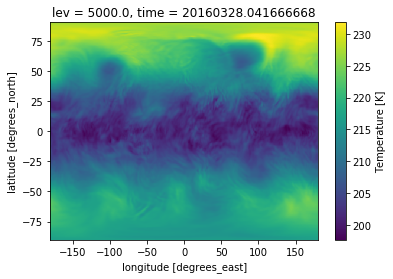

In [24]:
one.plot()

In [25]:
dim = "lon"
var = "temp"
dimk = "lev"

selection = dict(lon=23,lat=12)
# o = .data
# list(range(0,o.size))
first.temp[:,:,:,0]
getattr(first, var).sel({dim:-180}).isel({dimk: 32})

<xarray.DataArray 'temp' (time: 1, lat: 361)>
array([[232.38188, 230.27576, 230.15643, ..., 241.86392, 241.83728, 241.93173]],
      dtype=float32)
Coordinates:
    lon      float64 -180.0
  * lat      (lat) float64 -90.0 -89.5 -89.0 -88.5 -88.0 ... 88.5 89.0 89.5 90.0
    lev      float64 6.5e+04
  * time     (time) float64 2.016e+07
Attributes:
    standard_name:  air_temperature
    long_name:      Temperature
    units:          K
    param:          0.0.0

In [26]:
getattr(first, var).sel(selection).lon

<xarray.DataArray 'lon' ()>
array(23.)
Coordinates:
    lon      float64 23.0
    lat      float64 12.0
Attributes:
    standard_name:  longitude
    long_name:      longitude
    units:          degrees_east
    axis:           X

In [27]:
getattr(first, var).sel(lat=slice(2,45)).lat

<xarray.DataArray 'lat' (lat: 87)>
array([ 2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5,  6. ,  6.5,  7. ,  7.5,
        8. ,  8.5,  9. ,  9.5, 10. , 10.5, 11. , 11.5, 12. , 12.5, 13. , 13.5,
       14. , 14.5, 15. , 15.5, 16. , 16.5, 17. , 17.5, 18. , 18.5, 19. , 19.5,
       20. , 20.5, 21. , 21.5, 22. , 22.5, 23. , 23.5, 24. , 24.5, 25. , 25.5,
       26. , 26.5, 27. , 27.5, 28. , 28.5, 29. , 29.5, 30. , 30.5, 31. , 31.5,
       32. , 32.5, 33. , 33.5, 34. , 34.5, 35. , 35.5, 36. , 36.5, 37. , 37.5,
       38. , 38.5, 39. , 39.5, 40. , 40.5, 41. , 41.5, 42. , 42.5, 43. , 43.5,
       44. , 44.5, 45. ])
Coordinates:
  * lat      (lat) float64 2.0 2.5 3.0 3.5 4.0 4.5 ... 43.0 43.5 44.0 44.5 45.0
Attributes:
    standard_name:  latitude
    long_name:      latitude
    units:          degrees_north
    axis:           Y

In [28]:
first

<xarray.Dataset>
Dimensions:            (lat: 361, lev: 47, lon: 721, time: 1)
Coordinates:
  * lon                (lon) float64 -180.0 -179.5 -179.0 ... 179.0 179.5 180.0
  * lat                (lat) float64 -90.0 -89.5 -89.0 -88.5 ... 89.0 89.5 90.0
  * lev                (lev) float64 10.0 25.0 50.0 ... 9.5e+04 9.75e+04 1e+05
  * time               (time) float64 2.016e+07
Data variables:
    TRO3_chemtr        (time, lev, lat, lon) float32 ...
    qv                 (time, lev, lat, lon) float32 ...
    qc                 (time, lev, lat, lon) float32 ...
    qi                 (time, lev, lat, lon) float32 ...
    u                  (time, lev, lat, lon) float32 ...
    v                  (time, lev, lat, lon) float32 ...
    w                  (time, lev, lat, lon) float32 ...
    geopot             (time, lev, lat, lon) float32 ...
    omega              (time, lev, lat, lon) float32 ...
    pv                 (time, lev, lat, lon) float32 ...
    vor                (time, lev, lat, lon) float32 ...
    z_ifc              (lev, lat, lon) float32 ...
    temp               (time, lev, lat, lon) float32 ...
    TR_cold_chemtr     (time, lev, lat, lon) float32 ...
    TRN2O_chemtr       (time, lev, lat, lon) float32 ...
    TRNOy_chemtr       (time, lev, lat, lon) float32 ...
    TRO3_pas_chemtr    (time, lev, lat, lon) float32 ...
    TRN2O_pass_chemtr  (time, lev, lat, lon) float32 ...
    TRCly_pass_chemtr  (time, lev, lat, lon) float32 ...
    tempv              (time, lev, lat, lon) float32 ...
    TR_art_pv_chemtr   (time, lev, lat, lon) float32 ...
    TR_stn             (time, lev, lat, lon) float32 ...
    TR_stt             (time, lev, lat, lon) float32 ...
    TR_sts             (time, lev, lat, lon) float32 ...
    TR_trn             (time, lev, lat, lon) float32 ...
    TR_trt             (time, lev, lat, lon) float32 ...
    TRCH4_chemtr       (time, lev, lat, lon) float32 ...
    TRH2O_chemtr       (time, lev, lat, lon) float32 ...
    TRH2O_pass_chemtr  (time, lev, lat, lon) float32 ...
    TRC2H6_chemtr      (time, lev, lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.7.2 (http://mpimet.mpg.de/...
    Conventions:  CF-1.4
    title:        ICON simulation
    institution:  Max Planck Institute for Meteorology/Deutscher Wetterdienst
    source:       git@git.mpimet.mpg.de:icon-kit.git@a050994927641c4c69180c28...
    history:      ./icon.exe at 20180526 141107
    references:   see MPIM/DWD publications
    comment:      ln1297@kit.edu (ln1297) on uc1n680 (Linux 3.10.0-693.11.6.e...